# Part 1: Identify Device via DNS Queries

## Load DNS Queries Pcap

In [81]:
from pcapfile import savefile
from pcapfile.protocols.linklayer import ethernet
from pcapfile.protocols.network import ip
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np


filePath="C:\\Users\\szell\\uva\\2021Spring\\network\\finalProject\\dns\\"
file1 = filePath+'dns1.pcap' #data from Auguest
file2= filePath+'dns2.pcap' #data from Sepetmber

### Load data from Auguest file

In [3]:
testcap = open(file1, 'rb')
raw1 = savefile.load_savefile(testcap, verbose=True)
testcap.close()

[+] attempting to load C:\Users\szell\uva\2021Spring\network\finalProject\dns\dns1.pcap
[+] found valid header
[+] loaded 1105677 packets
[+] finished loading savefile.


In [4]:
testcap = open(file1, 'rb')
ip_file1 = savefile.load_savefile(testcap, layers=2, verbose=True)
testcap.close()

[+] attempting to load C:\Users\szell\uva\2021Spring\network\finalProject\dns\dns1.pcap
[+] found valid header
[+] loaded 1105677 packets
[+] finished loading savefile.


### Load data from Sepetmber file

In [5]:
testcap = open(file2, 'rb')
raw2 = savefile.load_savefile(testcap, verbose=True)
testcap.close()

[+] attempting to load C:\Users\szell\uva\2021Spring\network\finalProject\dns\dns2.pcap
[+] found valid header
[+] loaded 947872 packets
[+] finished loading savefile.


In [6]:
testcap = open(file2, 'rb')
ip_file2 = savefile.load_savefile(testcap, layers=2, verbose=True)
testcap.close()

[+] attempting to load C:\Users\szell\uva\2021Spring\network\finalProject\dns\dns2.pcap
[+] found valid header
[+] loaded 947872 packets
[+] finished loading savefile.


## Main Functions

In [44]:
def getPacketByIp(targetIP):
    match1 = findMatchPacketIndex(ip_file1, targetIP)
    match2 =  findMatchPacketIndex(ip_file2, targetIP)
    return match1,match2

In [45]:
def createDomainNameToken(packageIDList1,packageIDList2):
    wordCloud={}
    wordCloud = addToWordCloud(wordCloud,packageIDList1,raw1)
    wordCloud = addToWordCloud(wordCloud,packageIDList2,raw2)
    return wordCloud

In [5]:
def findMatchPacketIndex(ip_file, targetIP):
    i = 0
    match = []
    for packet in ip_file.packets:
        try:
            if (packet.packet.payload.src == targetIP or packet.packet.payload.dst == targetIP):
                match.append(i)
            i+=1
        except:
            pass
    return match

In [47]:
def addToWordCloud(wordCloud, packageIDList, rawFile):
    for i in packageIDList:
        s = str(rawFile.packets[i].raw()).split("\\x")
        for ele in s:
            if (len(ele)>4):
                ele = re.sub(r'[\d][\d]', '', ele)
                if (ele in wordCloud):
                    wordCloud[ele] = wordCloud.get(ele)+1
                else:
                    wordCloud[ele] = 1
    return wordCloud

In [48]:
def Sort_Tuple(tup): 
    tup.sort(key = lambda x: x[1], reverse = True) 
    return tup 

In [59]:
def filterWordCloudByThreshold(wordCloud, ip_trace1, ip_trace2):
    threshold = (len(ip_trace1)+len(ip_trace2))/10
    return [(k, v) for k, v in wordCloud.items() if v >  threshold]

In [131]:
def getWordCloudByIP(ip):
    ip_trace1,ip_trace2 = getPacketByIp(ip)
    wordCloud = createDomainNameToken(ip_trace1,ip_trace2)
    filterWordCloud = filterWordCloudByThreshold(wordCloud, ip_trace1,ip_trace2)

    sortedWordCloud = Sort_Tuple(filterWordCloud)
    
    word_list = []
    frequency_list=[]
    
    for entry in sortedWordCloud:
        print ("freq: ", entry[1], "\t word: ", entry[0])
        word_list.append(entry[0])
        frequency_list.append(entry[1])
    
    wc_dct = dict(zip(word_list, frequency_list))
    return wc_dct

In [157]:
def plotAndSave(ip,wc_dct):
    fig = WordCloud(width=800, height=400, max_words=20,background_color="white").generate_from_frequencies(wc_dct)
    plt.figure()
    plt.imshow(fig, interpolation="bilinear")
    plt.axis("off")
    fig.to_file("img/"+ str(ip).split(".")[3] +".png")

## Extract DNS WordCloud by IP

freq:  38321 	 word:  com
freq:  32085 	 word:  net
freq:  24605 	 word:  login
freq:  15498 	 word:  bing
freq:  15465 	 word:  0etrafficmanager
freq:  15252 	 word:  platform
freq:  12668 	 word:  rps
freq:  11383 	 word:  skype
freq:  10403 	 word:  \rk
freq:  10147 	 word:  speech
freq:  10147 	 word:  speech-platform-bing-com
freq:  10147 	 word:  a-
freq:  10147 	 word:  a-msedge
freq:  10147 	 word:  0bdual-a-
freq:  9942 	 word:  msa
freq:  9768 	 word:  live
freq:  9768 	 word:  msa\nmsidentity
freq:  8207 	 word:  cloudapp
freq:  8085 	 word:  edge
freq:  5105 	 word:  \nwebsockets
freq:  5105 	 word:  any
freq:  5069 	 word:  akadns6
freq:  4880 	 word:  lgin


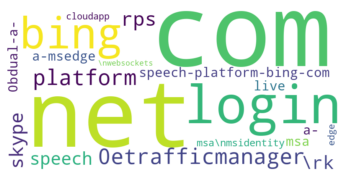

In [195]:
ip = b'192.168.0.45'
wc_dct = getWordCloudByIP(ip)
savefig = plotAndSave(ip,wc_dct)